# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

# Display the data table for preview
merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
mouse_count = len(merged['Mouse ID'].unique())
mouse_count

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups = merged[merged.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
dups

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
#df_new[df_new['l_ext'].isin([31, 22, 30, 25, 64])]
dup_pd = merged[merged['Mouse ID'].isin(dups)]
dup_pd

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_pd = merged.loc[merged['Mouse ID'].isin(dups) == False, :]
cleaned_pd

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice in the clean DataFrame.
cleaned_count = len(cleaned_pd['Mouse ID'].unique())
cleaned_count

248

## Summary Statistics

In [72]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_series = cleaned_pd.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_series = cleaned_pd.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
var_series = cleaned_pd.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std_series = cleaned_pd.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem_series = cleaned_pd.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg([st.sem])

# Assemble the resulting series into a single summary DataFrame.
merged_summary = pd.merge(mean_series, median_series, on=["Drug Regimen"]).rename(columns={"Tumor Volume (mm3)_x": "Mean Tumor Volume", "Tumor Volume (mm3)_y": "Median Tumor Volume"})
merged_summary = pd.merge(merged_summary, var_series, on=["Drug Regimen"]).rename(columns={"Tumor Volume (mm3)": "Tumor Volume Variance"})
merged_summary = pd.merge(merged_summary, std_series, on=["Drug Regimen"]).rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Dev."})
merged_summary = pd.merge(merged_summary, sem_series, on=["Drug Regimen"]).rename(columns={"sem": "Tumor Volume Std. Err."})
merged_summary
#sem_series


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [73]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_pd = cleaned_pd.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': [np.mean, np.median, np.var, np.std, st.sem]})
summary_pd

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

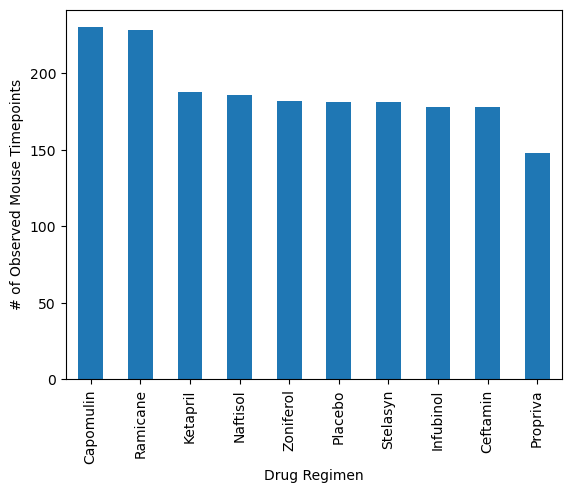

In [96]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plot_series = cleaned_pd['Drug Regimen'].value_counts()
plot_series.plot(kind="bar", ylabel = '# of Observed Mouse Timepoints')

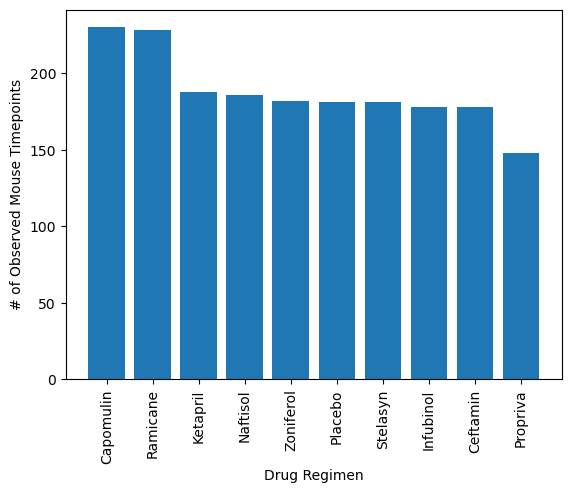

In [120]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
y = plot_series.to_frame()['count']
x = plot_series.to_frame().index
plt.bar(x, y)
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

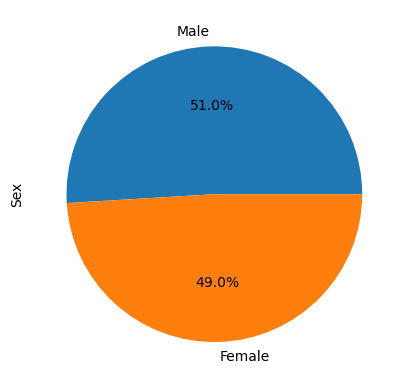

In [128]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = cleaned_pd['Sex'].value_counts()
pie = sex_counts.plot(kind="pie", y='count', ylabel='Sex', autopct='%0.1f%%')

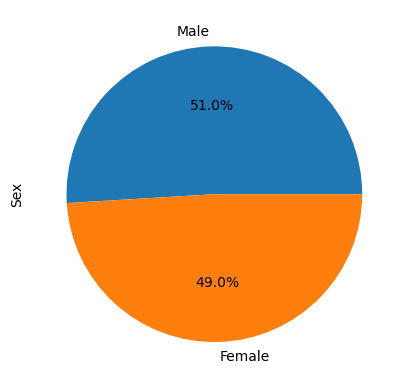

In [144]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
y = sex_counts.to_frame()['count']
x = sex_counts.to_frame().index

plt.pie(y, labels=x, autopct='%0.1f%%')
plt.ylabel("Sex")
plt.show() 

## Quartiles, Outliers and Boxplots

In [151]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
latest_pd = cleaned_pd.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max()
#latest_pd

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_treatments = pd.merge(latest_pd, cleaned_pd, how="left", on=['Mouse ID', 'Drug Regimen', 'Timepoint'])
merged_treatments

,Mouse ID,Drug Regimen,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,45,Female,20,23,67.973419,2
1,a251,Infubinol,45,Female,21,25,65.525743,1
2,a262,Placebo,45,Female,17,29,70.717621,4
3,a275,Ceftamin,45,Female,20,28,62.999356,3
4,a366,Stelasyn,30,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,10,Female,12,26,48.710661,0
244,z578,Ramicane,45,Male,11,16,30.638696,0
245,z581,Infubinol,45,Female,24,25,62.754451,3
246,z795,Naftisol,45,Female,13,29,65.741070,3


In [160]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []
capomulin_list = list(merged_treatments.loc[merged_treatments["Drug Regimen"] == 'Capomulin', :]['Tumor Volume (mm3)'])
ramicane_list = list(merged_treatments.loc[merged_treatments["Drug Regimen"] == 'Ramicane', :]['Tumor Volume (mm3)'])
infubinol_list = list(merged_treatments.loc[merged_treatments["Drug Regimen"] == 'Infubinol', :]['Tumor Volume (mm3)'])
ceftamin_list = list(merged_treatments.loc[merged_treatments["Drug Regimen"] == 'Ceftamin', :]['Tumor Volume (mm3)'])

tumor_vols.append(capomulin_list)
tumor_vols.append(ramicane_list)
tumor_vols.append(infubinol_list)
tumor_vols.append(ceftamin_list)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


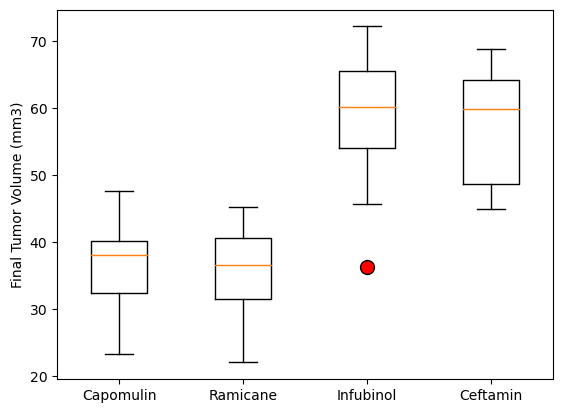

In [169]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')

plot_dict = {}
for i in range(len(tumor_vols)):
    plot_dict[treatments[i]] = tumor_vols[i]

ax1.boxplot(plot_dict.values(), flierprops = dict(markersize= 10, markerfacecolor = "red"))
ax1.set_xticklabels(plot_dict.keys())

plt.show()

## Line and Scatter Plots

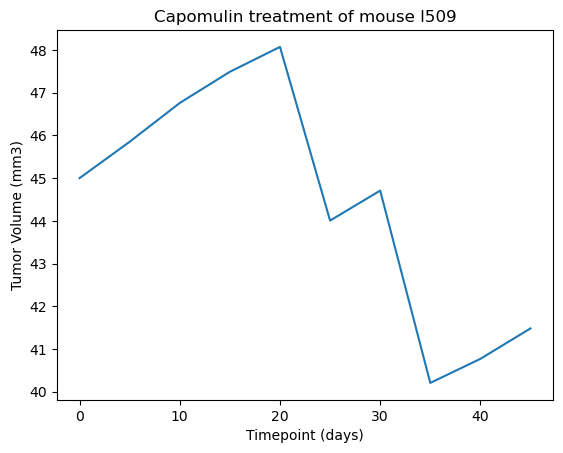

In [210]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Mouse with Mouse ID b128 is selected.
selected_mouse_pd = cleaned_pd.loc[cleaned_pd["Mouse ID"] == 'l509', :]
plt.plot(selected_mouse_pd['Timepoint'], selected_mouse_pd['Tumor Volume (mm3)'])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

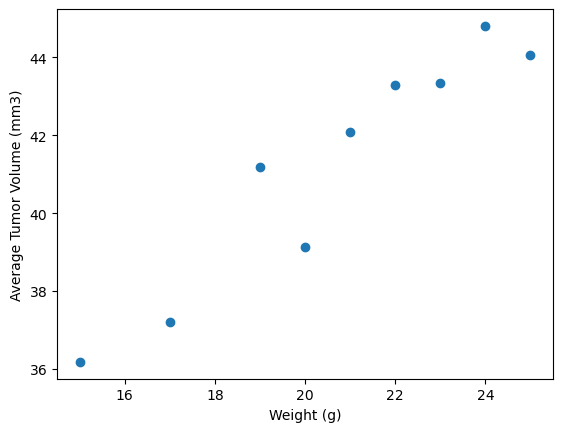

Weight (g)
15    36.182040
17    37.214133
19    41.182391
20    39.141053
21    42.088700
22    43.288490
23    43.341051
24    44.805810
25    44.062109
Name: Tumor Volume (mm3), dtype: float64

In [209]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
c_mouse = cleaned_pd.loc[cleaned_pd["Drug Regimen"] == 'Capomulin', :]
c_mouse = c_mouse.groupby(['Weight (g)'])['Tumor Volume (mm3)'].mean()
plt.scatter(c_mouse.index, c_mouse)
#plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
c_mouse

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


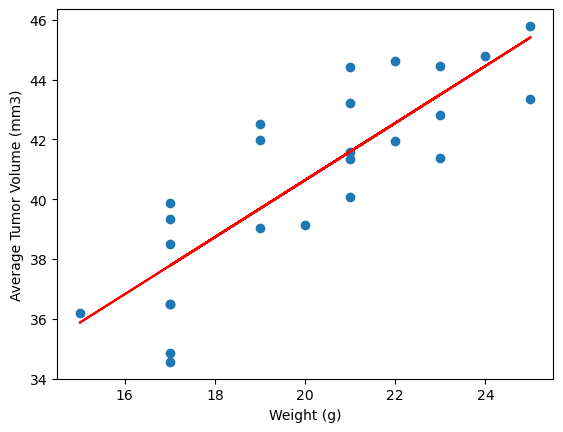

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
